In [93]:
from matplotlib import pyplot as plt
import numpy as np

 Количество измерений $N=15$

In [94]:
N = 16

Переменное сопротивление $R=100,200,...,1500$

In [95]:
Rs = np.arange(0,1600,100)
print(Rs)

[   0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300
 1400 1500]


Измеренная зависимость $U=U(I)$

*СЮДА ВСТАВИТЬ ИЗМЕРЕНИЯ В 2 МАССИВА*

In [96]:
Us = np.array([
    0.0, 1.0, 2.1, 2.9, 3.7, 4.3, 5.0, 5.4, 5.8, 6.1, 6.4, 6.6, 6.9, 7.1, 7.3, 7.3
])
Is = np.array([
    .015, .014, .013, .011, .010, .009, .008, .008, .007, .007, .006, .006, .005, .005, .005, .005
])
len(Us), len(Is)

(16, 16)

График зависимост $U = U(I)$ и $r, \mathcal{E}$

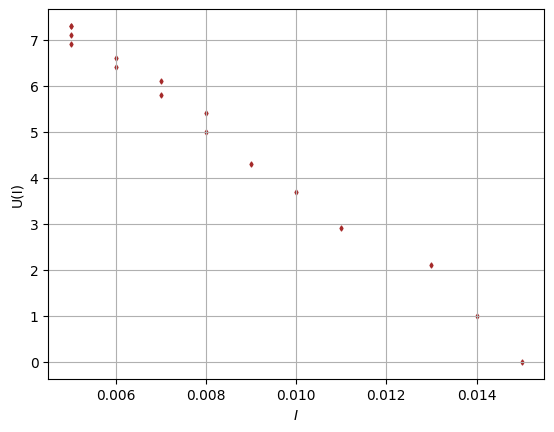

In [144]:
plt.grid()
plt.scatter(Is, Us, marker="d", color="brown", s=6)
plt.xlabel("$I$")
plt.ylabel("U(I)")
# plt.title("График зависимости U(I)")
plt.show()

In [98]:
r, Epsilon = np.polyfit(Is, Us, 1)
r *= -1
print(f"r = {r}\tEpsilon = {Epsilon}")

r = 691.579731743666	Epsilon = 10.660730253353206


Расчёт $P_R = UI$; 
$P = \mathcal{E}I$;
$P_S = I^2r$ для каждого измерения

In [99]:
P = Epsilon*Is
Pr = Us*Is
Ps = Is*Is*r

arr = (np.vstack((Us, Is, Pr, Ps, P))).T
np.set_printoptions(precision=3)
print(
    arr
)

arr[:, 1:] *= 1000
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        print(f"[{arr[i, j]: .3f}]", end=', ')
    print()

[[0.000e+00 1.500e-02 0.000e+00 1.556e-01 1.599e-01]
 [1.000e+00 1.400e-02 1.400e-02 1.355e-01 1.493e-01]
 [2.100e+00 1.300e-02 2.730e-02 1.169e-01 1.386e-01]
 [2.900e+00 1.100e-02 3.190e-02 8.368e-02 1.173e-01]
 [3.700e+00 1.000e-02 3.700e-02 6.916e-02 1.066e-01]
 [4.300e+00 9.000e-03 3.870e-02 5.602e-02 9.595e-02]
 [5.000e+00 8.000e-03 4.000e-02 4.426e-02 8.529e-02]
 [5.400e+00 8.000e-03 4.320e-02 4.426e-02 8.529e-02]
 [5.800e+00 7.000e-03 4.060e-02 3.389e-02 7.463e-02]
 [6.100e+00 7.000e-03 4.270e-02 3.389e-02 7.463e-02]
 [6.400e+00 6.000e-03 3.840e-02 2.490e-02 6.396e-02]
 [6.600e+00 6.000e-03 3.960e-02 2.490e-02 6.396e-02]
 [6.900e+00 5.000e-03 3.450e-02 1.729e-02 5.330e-02]
 [7.100e+00 5.000e-03 3.550e-02 1.729e-02 5.330e-02]
 [7.300e+00 5.000e-03 3.650e-02 1.729e-02 5.330e-02]
 [7.300e+00 5.000e-03 3.650e-02 1.729e-02 5.330e-02]]
[ 0.000], [ 15.000], [ 0.000], [ 155.605], [ 159.911], 
[ 1.000], [ 14.000], [ 14.000], [ 135.550], [ 149.250], 
[ 2.100], [ 13.000], [ 27.300], [ 116.

Графики для других можностей от Силы тока

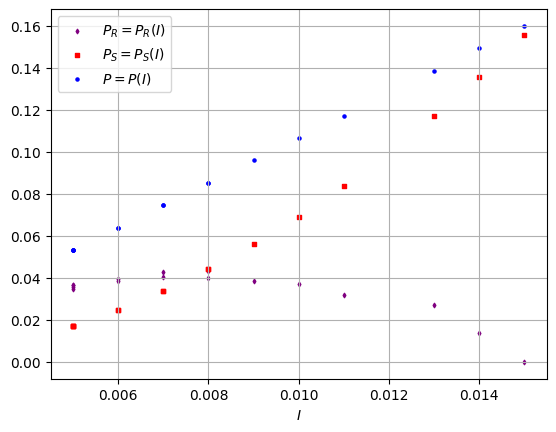

In [143]:
plt.scatter(Is, Pr, s=5, color="purple", marker="d", label="$P_R=P_R(I)$")
plt.scatter(Is, Ps, s=5, color="red", marker="s", label="$P_S=P_S(I)$")
plt.scatter(Is, P, s=5, color="blue", marker="o", label="$P=P(I)$")
plt.legend()
# plt.title("Графики зависимости мощностей $P, P_R, P_S$ от силы тока")
plt.xlabel("$I$")

plt.grid()
plt.show()

Поиск $I^*, P_{Rmax}$

I* = 0.0077


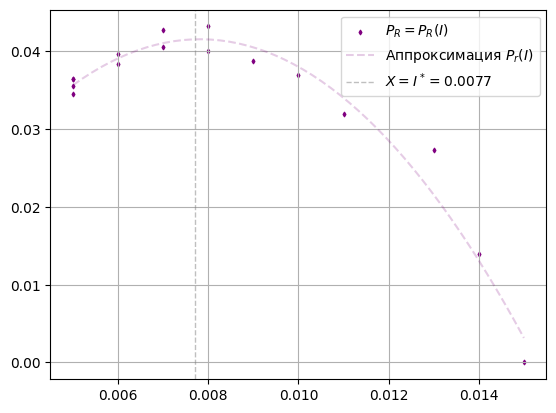

In [101]:
I_star = Epsilon/(2*r)
print(f"I* = {I_star:.4f}")

i = np.polyfit(Is, Pr, 2)
approx_Is = np.linspace(min(Is), max(Is))
approx = np.polyval(i, approx_Is)


plt.scatter(Is, Pr, s=5, color="purple", marker="d", label="$P_R=P_R(I)$")
plt.plot(approx_Is, approx, color="purple", alpha=.2, linestyle='--', label="Аппроксимация $P_r(I)$")
plt.grid()


plt.axvline([I_star], color="grey", linestyle='--', linewidth=1, alpha=.5, label="$X=I^*=0.0077$")
plt.legend()


P_Rmax = 0.042


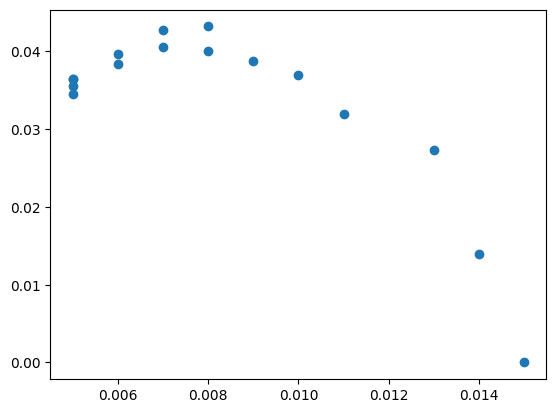

In [102]:
i = np.polyfit(Is, Pr, 2)
P_Rmax = np.polyval(i, I_star)
print(f"P_Rmax = {P_Rmax:.3f}")

plt.scatter(Is, Pr)
# plt.plot(np.linspace(Is[0], Is[-1]), )

Поиск сопротивления $R$

In [103]:
R =  P_Rmax / I_star**2
print(f"R = {R:.3f}")

R = 699.432


Поиск значения КПД $\eta=\cfrac{P_R}{P}$ как функции $\eta (I)$

[0.    0.094 0.197 0.272 0.347 0.403 0.469 0.507 0.544 0.572 0.6   0.619
 0.647 0.666 0.685 0.685]


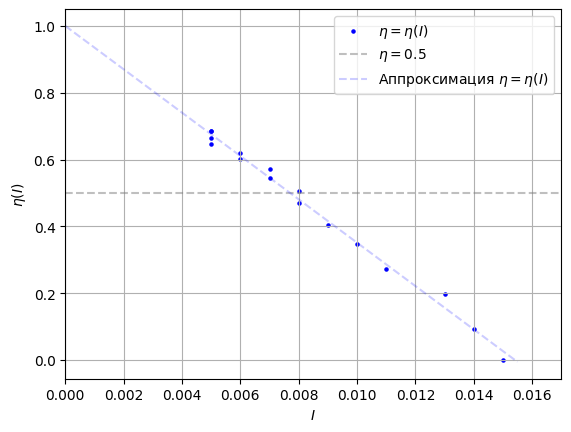

In [142]:
eta = Pr / P



print(eta)

plt.scatter(Is, eta, s=5, color="blue", label="$\eta=\eta(I)$")
plt.xlabel("$I$")
plt.ylabel("$\eta (I)$")
# plt.title("Значения КПД")

plt.axhline([0.5], label="$\eta=0.5$", color="grey", linestyle="--", alpha=.5)

plt.xlim(0, 0.017)
# plt.ylim(0, 0.7)

approx_x = np.linspace(0, 0.0155)
i = np.polyfit(Is, eta, 1)
approx = np.polyval(i, approx_x)

plt.plot(approx_x, approx, color="blue", linestyle='--', alpha=.2, label="Аппроксимация $\eta=\eta (I)$")


plt.legend()
plt.grid()

plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 16 and the array at index 1 has size 1

In [137]:
eta = np.reshape(eta, (16, 1))
eta

array([[0.   ],
       [0.094],
       [0.197],
       [0.272],
       [0.347],
       [0.403],
       [0.469],
       [0.507],
       [0.544],
       [0.572],
       [0.6  ],
       [0.619],
       [0.647],
       [0.666],
       [0.685],
       [0.685]])

In [131]:
arr

array([[  0.   ,  15.   ,   0.   , 155.605, 159.911],
       [  1.   ,  14.   ,  14.   , 135.55 , 149.25 ],
       [  2.1  ,  13.   ,  27.3  , 116.877, 138.589],
       [  2.9  ,  11.   ,  31.9  ,  83.681, 117.268],
       [  3.7  ,  10.   ,  37.   ,  69.158, 106.607],
       [  4.3  ,   9.   ,  38.7  ,  56.018,  95.947],
       [  5.   ,   8.   ,  40.   ,  44.261,  85.286],
       [  5.4  ,   8.   ,  43.2  ,  44.261,  85.286],
       [  5.8  ,   7.   ,  40.6  ,  33.887,  74.625],
       [  6.1  ,   7.   ,  42.7  ,  33.887,  74.625],
       [  6.4  ,   6.   ,  38.4  ,  24.897,  63.964],
       [  6.6  ,   6.   ,  39.6  ,  24.897,  63.964],
       [  6.9  ,   5.   ,  34.5  ,  17.289,  53.304],
       [  7.1  ,   5.   ,  35.5  ,  17.289,  53.304],
       [  7.3  ,   5.   ,  36.5  ,  17.289,  53.304],
       [  7.3  ,   5.   ,  36.5  ,  17.289,  53.304]])

In [140]:
arr = np.hstack((arr, eta))

In [141]:
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        print(f"[{arr[i, j]: .3f}]", end=', ')
    print()

[ 0.000], [ 15.000], [ 0.000], [ 155.605], [ 159.911], [ 0.000], 
[ 1.000], [ 14.000], [ 14.000], [ 135.550], [ 149.250], [ 0.094], 
[ 2.100], [ 13.000], [ 27.300], [ 116.877], [ 138.589], [ 0.197], 
[ 2.900], [ 11.000], [ 31.900], [ 83.681], [ 117.268], [ 0.272], 
[ 3.700], [ 10.000], [ 37.000], [ 69.158], [ 106.607], [ 0.347], 
[ 4.300], [ 9.000], [ 38.700], [ 56.018], [ 95.947], [ 0.403], 
[ 5.000], [ 8.000], [ 40.000], [ 44.261], [ 85.286], [ 0.469], 
[ 5.400], [ 8.000], [ 43.200], [ 44.261], [ 85.286], [ 0.507], 
[ 5.800], [ 7.000], [ 40.600], [ 33.887], [ 74.625], [ 0.544], 
[ 6.100], [ 7.000], [ 42.700], [ 33.887], [ 74.625], [ 0.572], 
[ 6.400], [ 6.000], [ 38.400], [ 24.897], [ 63.964], [ 0.600], 
[ 6.600], [ 6.000], [ 39.600], [ 24.897], [ 63.964], [ 0.619], 
[ 6.900], [ 5.000], [ 34.500], [ 17.289], [ 53.304], [ 0.647], 
[ 7.100], [ 5.000], [ 35.500], [ 17.289], [ 53.304], [ 0.666], 
[ 7.300], [ 5.000], [ 36.500], [ 17.289], [ 53.304], [ 0.685], 
[ 7.300], [ 5.000], [ 36.500